# Contents

0. Intro
1. Packages, files and paths
2. Data Structure
3. Exploring Application Train
4. Further analysis on Application Train data

# 0. Intro

Here we have data from Kaggle's Home Credit problem, unbanked people getting loan and paying or not on day. The idea is to explore the data and understand better the problem. The main goal is to classify the risk of paying with delay.

My initial hypothesis is that the base is made up of a high number of informal workers, since they are "not in the banking system". In the case of informal work, income is expected to be relatively low. Let's check if this is the case.

# 1. Packages, files, paths

#### Packages used to explore data

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Paths and files names

In [2]:
DATA_FOLDER_FULL_PATH = os.getcwd() + '\\data'

CSVS_PATH_DICTS = {}

for root, dirs, files in os.walk(DATA_FOLDER_FULL_PATH):
    for file in files:
        if file.endswith(".csv"):
            print(f'file name: {file}')
            CSVS_PATH_DICTS[file.split('.csv')[0]] = DATA_FOLDER_FULL_PATH + '\\' + file


print(CSVS_PATH_DICTS)      

file name: application_test.csv
file name: application_train.csv
file name: bureau.csv
file name: bureau_balance.csv
file name: credit_card_balance.csv
file name: HomeCredit_columns_description.csv
file name: installments_payments.csv
file name: POS_CASH_balance.csv
file name: previous_application.csv
file name: sample_submission.csv
{'application_test': 'c:\\Users\\Pichau\\Documents\\Projetos\\desafio_itau\\data\\application_test.csv', 'application_train': 'c:\\Users\\Pichau\\Documents\\Projetos\\desafio_itau\\data\\application_train.csv', 'bureau': 'c:\\Users\\Pichau\\Documents\\Projetos\\desafio_itau\\data\\bureau.csv', 'bureau_balance': 'c:\\Users\\Pichau\\Documents\\Projetos\\desafio_itau\\data\\bureau_balance.csv', 'credit_card_balance': 'c:\\Users\\Pichau\\Documents\\Projetos\\desafio_itau\\data\\credit_card_balance.csv', 'HomeCredit_columns_description': 'c:\\Users\\Pichau\\Documents\\Projetos\\desafio_itau\\data\\HomeCredit_columns_description.csv', 'installments_payments': 'c

# 2. Data Structure

#### Analyzing structuring of files

Let's start with application_train and HomeCredit_columns_description to understand better the idea of the problem.

I used Notepad++ to discover files encodings. Since HomeCredit_columns_description is encoded with ANSI, we can use the group ISO-8859-1 to read (found this on Stackoverflow).

In [3]:
df_HomeCredit_columns_description = pd.read_csv(CSVS_PATH_DICTS['HomeCredit_columns_description'],
                                                sep = ',',
                                                encoding= 'ISO-8859-1')

df_HomeCredit_columns_description.head(5)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
df_HomeCredit_columns_description.loc[df_HomeCredit_columns_description['Table'] == 'application_{train|test}.csv']

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [5]:
df_application_train = pd.read_csv(CSVS_PATH_DICTS['application_train'],
                                   sep = ',',
                                   encoding= 'utf-8')

df_application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
for col in df_application_train.columns:
    print(f"{col} - {df_application_train[col].dtype}")

SK_ID_CURR - int64
TARGET - int64
NAME_CONTRACT_TYPE - object
CODE_GENDER - object
FLAG_OWN_CAR - object
FLAG_OWN_REALTY - object
CNT_CHILDREN - int64
AMT_INCOME_TOTAL - float64
AMT_CREDIT - float64
AMT_ANNUITY - float64
AMT_GOODS_PRICE - float64
NAME_TYPE_SUITE - object
NAME_INCOME_TYPE - object
NAME_EDUCATION_TYPE - object
NAME_FAMILY_STATUS - object
NAME_HOUSING_TYPE - object
REGION_POPULATION_RELATIVE - float64
DAYS_BIRTH - int64
DAYS_EMPLOYED - int64
DAYS_REGISTRATION - float64
DAYS_ID_PUBLISH - int64
OWN_CAR_AGE - float64
FLAG_MOBIL - int64
FLAG_EMP_PHONE - int64
FLAG_WORK_PHONE - int64
FLAG_CONT_MOBILE - int64
FLAG_PHONE - int64
FLAG_EMAIL - int64
OCCUPATION_TYPE - object
CNT_FAM_MEMBERS - float64
REGION_RATING_CLIENT - int64
REGION_RATING_CLIENT_W_CITY - int64
WEEKDAY_APPR_PROCESS_START - object
HOUR_APPR_PROCESS_START - int64
REG_REGION_NOT_LIVE_REGION - int64
REG_REGION_NOT_WORK_REGION - int64
LIVE_REGION_NOT_WORK_REGION - int64
REG_CITY_NOT_LIVE_CITY - int64
REG_CITY_NOT_WOR

In [7]:
df_application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Calculate the percentage of missing values in each column
missing_percentage = (df_application_train.isnull().sum() / len(df_application_train)) * 100

for col, value in missing_percentage.items():
    print(f"% of missing data or NaN for {col}: {value}")

% of missing data or NaN for SK_ID_CURR: 0.0
% of missing data or NaN for TARGET: 0.0
% of missing data or NaN for NAME_CONTRACT_TYPE: 0.0
% of missing data or NaN for CODE_GENDER: 0.0
% of missing data or NaN for FLAG_OWN_CAR: 0.0
% of missing data or NaN for FLAG_OWN_REALTY: 0.0
% of missing data or NaN for CNT_CHILDREN: 0.0
% of missing data or NaN for AMT_INCOME_TOTAL: 0.0
% of missing data or NaN for AMT_CREDIT: 0.0
% of missing data or NaN for AMT_ANNUITY: 0.003902299429939092
% of missing data or NaN for AMT_GOODS_PRICE: 0.09040327012692229
% of missing data or NaN for NAME_TYPE_SUITE: 0.42014757195677555
% of missing data or NaN for NAME_INCOME_TYPE: 0.0
% of missing data or NaN for NAME_EDUCATION_TYPE: 0.0
% of missing data or NaN for NAME_FAMILY_STATUS: 0.0
% of missing data or NaN for NAME_HOUSING_TYPE: 0.0
% of missing data or NaN for REGION_POPULATION_RELATIVE: 0.0
% of missing data or NaN for DAYS_BIRTH: 0.0
% of missing data or NaN for DAYS_EMPLOYED: 0.0
% of missing dat

Some columns have a big ratio of missing data/NaN values

We might need to remove those columns on modelling step

# 3.0 Exploring Application Train

We will focus on explore the train data, to understand better the problem. Then we can check a few auxiliary database. The test database may remain unseen, to not induce any bias in our analysis

#### 3.1 Target variable

The target variable is 0 or 1, 1 means difficulty to pay the loan

In [9]:
df_application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

Surprisingly, most had no payment difficulties. Something similar happens with microcredit (https://en.wikipedia.org/wiki/Microcredit)

In [10]:
df_application_train['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

#### 3.2 Cash loan

Predominant type of cash loan. First question: is any relations between target and loan type?

<Axes: xlabel='NAME_CONTRACT_TYPE'>

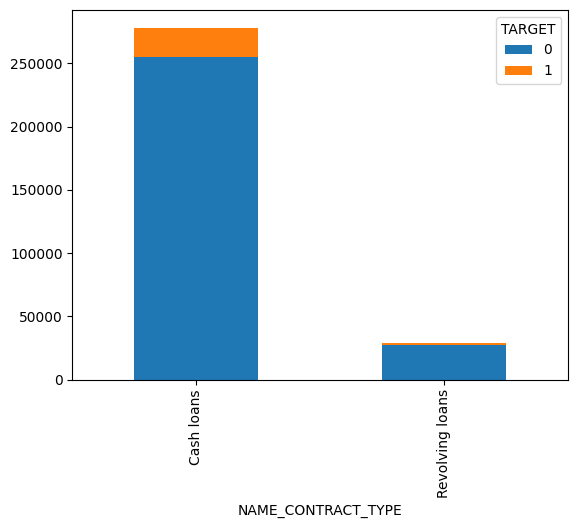

In [11]:
grouped_df = df_application_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True)


Seems that Resolvig loans type is more safe, but need further investigation

#### 3.3 Social variables

As there are numerous columns, focus on the following list:

- CODE_GENDER 
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- REGION_POPULATION_RELATIVE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- OWN_CAR_AGE
- FLAG_MOBIL
- FLAG_EMP_PHONE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- OCCUPATION_TYPE

This seems like basic information for a credit problem (not my specialty), so let's start by spending some time with the basics. Furthermore they had small ratio of NaNs.

Some of those columns contains text data and other numeric data, we will first separate these list into text and numeric

In [12]:
STUDY_COLUMNS_LIST = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "REGION_POPULATION_RELATIVE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "DAYS_REGISTRATION",
    "DAYS_ID_PUBLISH",
    "OWN_CAR_AGE",
    "FLAG_MOBIL",
    "FLAG_EMP_PHONE",
    "FLAG_WORK_PHONE",
    "FLAG_CONT_MOBILE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "OCCUPATION_TYPE"
]

While creating the lists, we can have a first look on how data looks like in each column.

It is a good way to see text data, but maybe not good to understand numerical data

In [13]:
STUDY_COLUMNS_LIST_NUMERIC = []
STUDY_COLUMNS_LIST_TEXT = []
for col in STUDY_COLUMNS_LIST:
    print(df_application_train[col].value_counts())
    print('------------------------------')
    if df_application_train[col].dtype == 'object':
        STUDY_COLUMNS_LIST_TEXT.append(col)
    else:
        STUDY_COLUMNS_LIST_NUMERIC.append(col)

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
------------------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
------------------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
------------------------------
CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64
------------------------------
AMT_INCOME_TOTAL
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: count, Length: 2548, dtype: int64
------------------------------
AMT_CREDIT
450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5  

We have almost the double of Womans. A low education level, but with a high level of landlords.

Barely 1/3 don't have a car. Strangely a lot of the people say that live in 'Unaccompanied' place, but most of the database say they are married.

Most don't have kids and seems that a most of people had a kind of job

In [14]:
STUDY_COLUMNS_LIST_NUMERIC

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

In [15]:
STUDY_COLUMNS_LIST_TEXT

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

Let's first check correlation between numeric columns. We will add TARGET, so maybe we can capture any behavior.

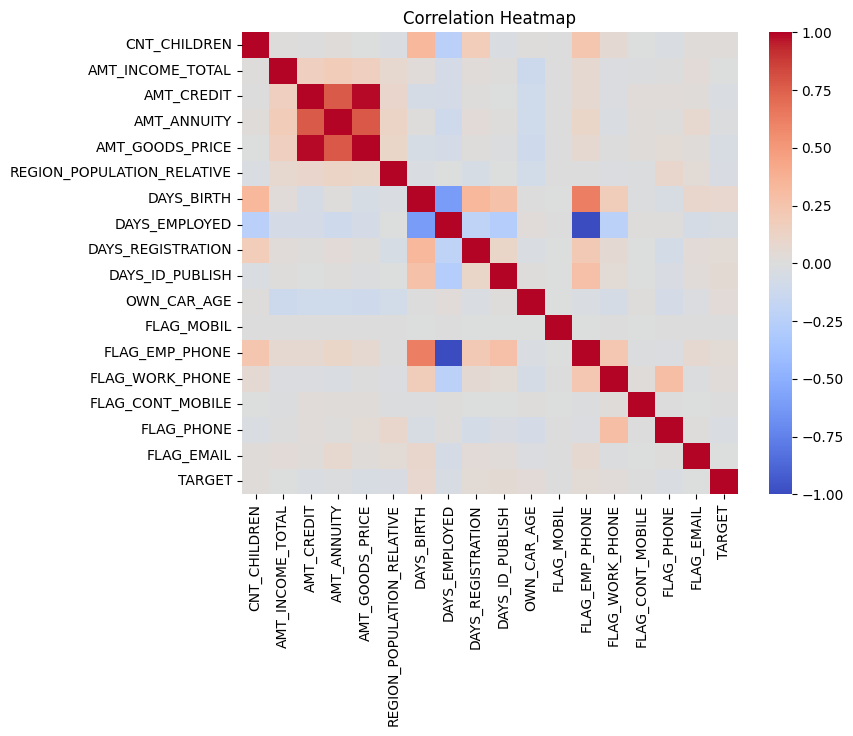

In [16]:
# Calculate the correlation matrix
correlation_matrix = df_application_train[STUDY_COLUMNS_LIST_NUMERIC + ['TARGET']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

No strong correlation with target variable (but it is also a binary variable, which means it is better to analyze in categories). A few strong correlations between a few variables. Probably expected, like have a company phone and total of days employed.


To understand better the database, let's look to a few social variables.

Starting with gender

<Axes: xlabel='CODE_GENDER'>

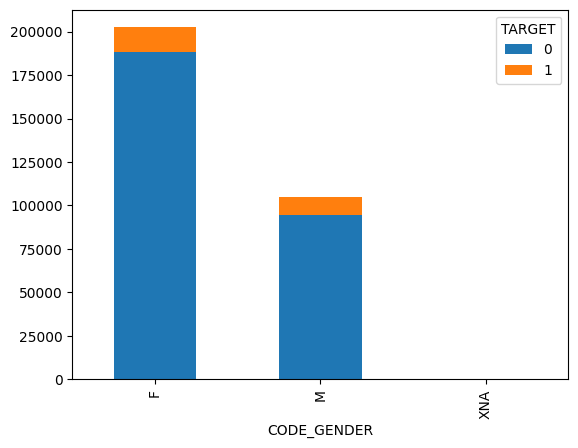

In [17]:
grouped_df = df_application_train.groupby(['CODE_GENDER', 'TARGET']).size().unstack(fill_value=0)

grouped_df.plot(kind='bar', stacked=True)

In [18]:
df_application_train[['CODE_GENDER','TARGET']].value_counts()

CODE_GENDER  TARGET
F            0         188278
M            0          94404
F            1          14170
M            1          10655
XNA          0              4
Name: count, dtype: int64

Proportionally speaking, men are delaying much more than women.

Exploring family status and relations

In [19]:
df_application_train[['NAME_FAMILY_STATUS','TARGET']].value_counts()

NAME_FAMILY_STATUS    TARGET
Married               0         181582
Single / not married  0          40987
Civil marriage        0          26814
Separated             0          18150
Widow                 0          15151
Married               1          14850
Single / not married  1           4457
Civil marriage        1           2961
Separated             1           1620
Widow                 1            937
Unknown               0              2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Single / not married'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Widow'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Unknown')])

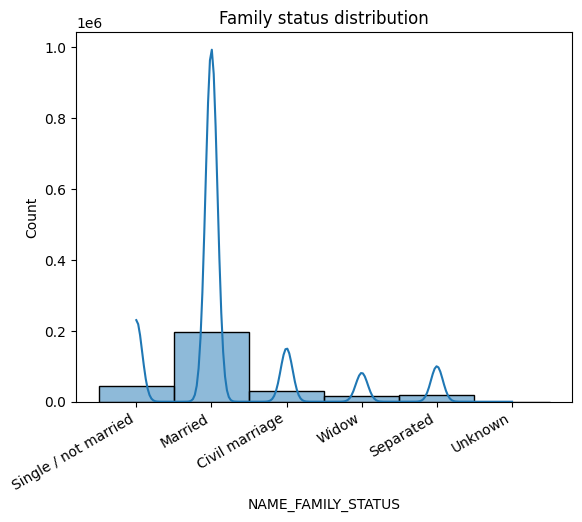

In [20]:
sns.histplot(df_application_train.NAME_FAMILY_STATUS, kde=True).set_title('Family status distribution')

# Rotate x-axis labels slightly for better visibility
plt.xticks(rotation=30, ha='right')

Text(0.5, 1.0, 'Children count status distribution')

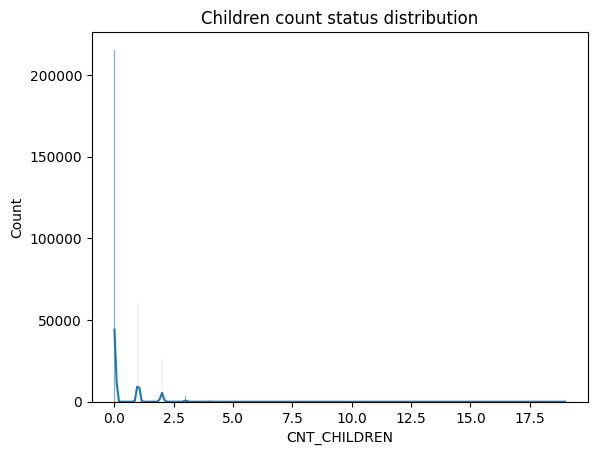

In [21]:
sns.histplot(df_application_train.CNT_CHILDREN, kde=True).set_title('Children count status distribution')

Text(0.5, 1.0, 'Family members count status distribution')

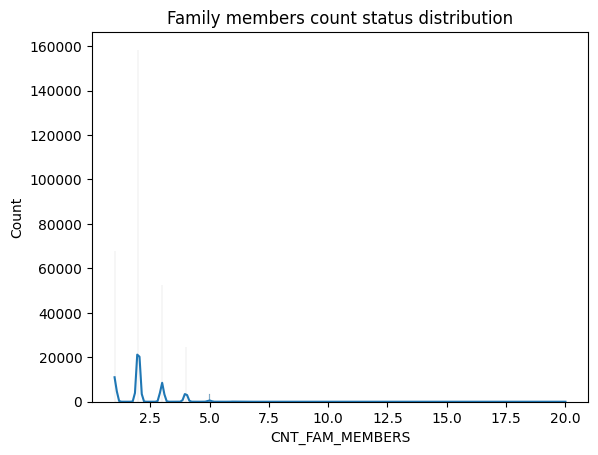

In [22]:
sns.histplot(df_application_train.CNT_FAM_MEMBERS, kde=True).set_title('Family members count status distribution')

Let's added some categories and check how TARGET behave

Test the following hypothesis:

- Having kids influence TARGET variable?
- Couples married with kids have less trend to delay payments?  Is the number of kids influent it somehow?
- Does not married (single and separated) people with kids less to delay payments?

In [23]:
''' Status for easy copy and paste
Married
Single / not married 
Civil marriage        
Separated             
Widow'''

df_family = df_application_train[['SK_ID_CURR','TARGET', 'CNT_CHILDREN','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','CNT_FAM_MEMBERS','OCCUPATION_TYPE']].copy()

# Had children column

'''Note: fast way to develop, but for a more complex flow, need to improve'''
df_family['had_children'] = 0
df_family['had_children'].loc[df_family['CNT_CHILDREN'] > 0] = 1
print(f"Had children total: {df_family['had_children'].sum()}")

# there are different categories for married, so join all in one column
df_family['married'] = 0
df_family['married'].loc[(df_family['NAME_FAMILY_STATUS'] == 'Married') | (df_family['NAME_FAMILY_STATUS'] == 'Civil marriage')] = 1
# first analysis, married with kids
df_family['married_with_kid'] = 0
df_family['married_with_kid'].loc[(df_family['CNT_CHILDREN'] > 0) & (df_family['married'] > 0)] = 1
print(f"Married with kids total: {df_family['married_with_kid'].sum()}")
# second analysis, married with more than one kid
df_family['married_with_more_kids'] = 0
df_family['married_with_more_kids'].loc[(df_family['CNT_CHILDREN'] > 2) & (df_family['married'] > 0)] = 1
print(f"Married with more than 1 kids total: {df_family['married_with_more_kids'].sum()}")
# third analysis, married with exactly 1 kid
df_family['married_with_one_kid'] = 0
df_family['married_with_one_kid'].loc[(df_family['CNT_CHILDREN'] == 1) & (df_family['married'] > 0)] = 1
print(f"Married with 1 kids total: {df_family['married_with_one_kid'].sum()}")

# now build others columns
df_family['separated_with_kids'] = 0
df_family['separated_with_kids'].loc[(df_family['CNT_CHILDREN'] > 0) & (df_family['NAME_FAMILY_STATUS'] == 'Separated')] = 1
print(f"Separated with kids total: {df_family['separated_with_kids'].sum()}")

df_family['single_with_kids'] = 0
df_family['single_with_kids'].loc[(df_family['CNT_CHILDREN'] > 0) & (df_family['NAME_FAMILY_STATUS'] == 'Single / not married')] = 1
print(f"Single with kids total: {df_family['single_with_kids'].sum()}")


Had children total: 92140
Married with kids total: 78685
Married with more than 1 kids total: 3969
Married with 1 kids total: 50284
Separated with kids total: 5638
Single with kids total: 6634


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7784\631731390.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family['had_children'].loc[df_family['CNT_CHILDREN'] > 0] = 1
C:\Users\Pichau\AppData\Local\Temp\ipykernel_7784\631731390.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family['married'].loc[(df_family['NAME_FAMILY_STATUS'] == 'Married') | (df_family['NAME_FAMILY_STATUS'] == 'Civil marriage')] = 1
C:\Users\Pichau\AppData\Local\Temp\ipykernel_7784\631731390.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

Maybe a correlation map with new columns help

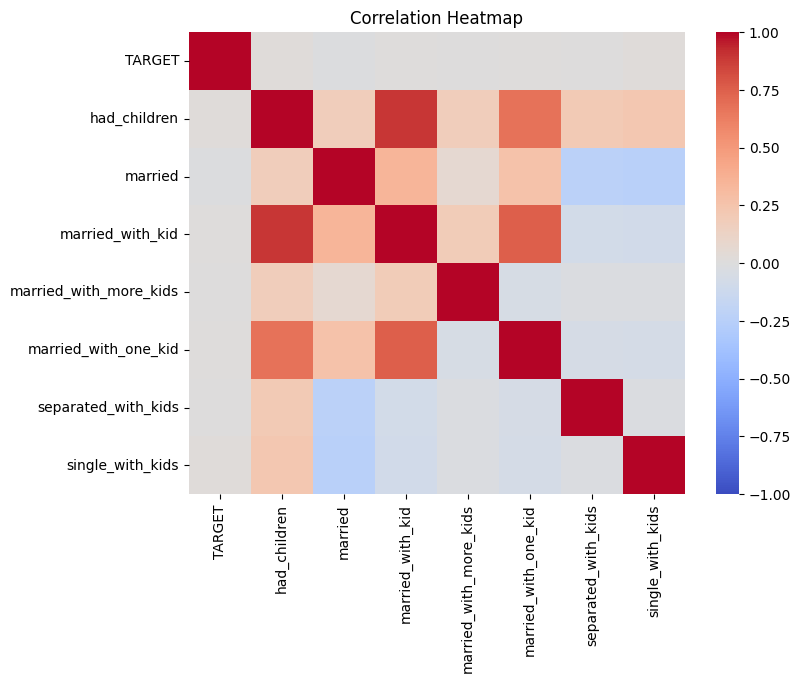

In [24]:
columns_to_explores = ['TARGET','had_children','married','married_with_kid','married_with_more_kids', 
                       'married_with_one_kid', 'separated_with_kids', 'single_with_kids']

# Calculate the correlation matrix
correlation_matrix = df_family[columns_to_explores].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Customize the plot
plt.title('Correlation Heatmap')
plt.show()

Let's explore more

had_children  TARGET
0             0         198762
1             0          83924
0             1          16609
1             1           8216
Name: count, dtype: int64
married  TARGET
1        0         208396
0        0          74290
1        1          17811
0        1           7014
Name: count, dtype: int64
married_with_kid  TARGET
0                 0         210878
1                 0          71808
0                 1          17948
1                 1           6877
Name: count, dtype: int64
married_with_more_kids  TARGET
0                       0         279111
                        1          24431
1                       0           3575
                        1            394
Name: count, dtype: int64
married_with_one_kid  TARGET
0                     0         236781
1                     0          45905
0                     1          20446
1                     1           4379
Name: count, dtype: int64
separated_with_kids  TARGET
0                    0         2

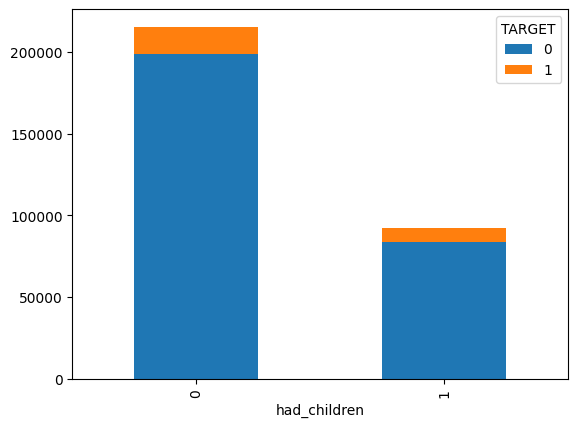

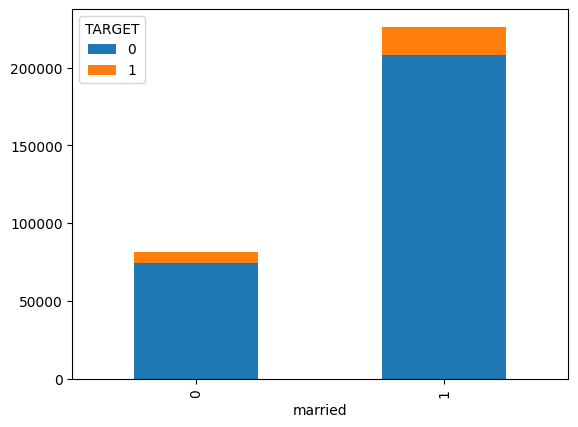

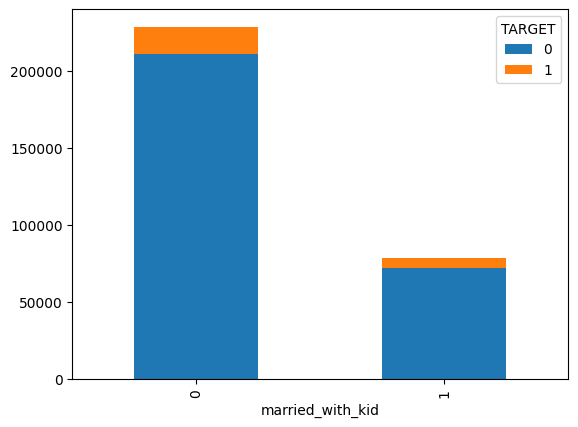

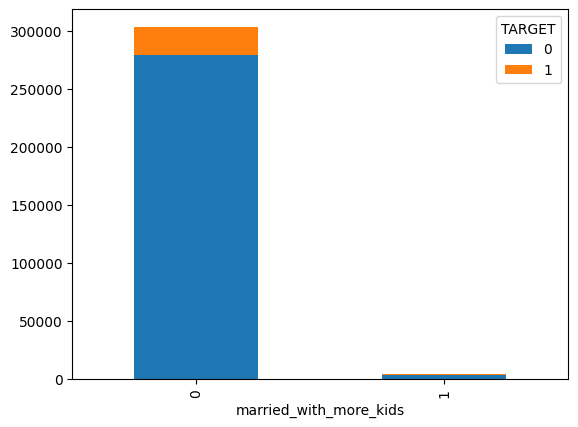

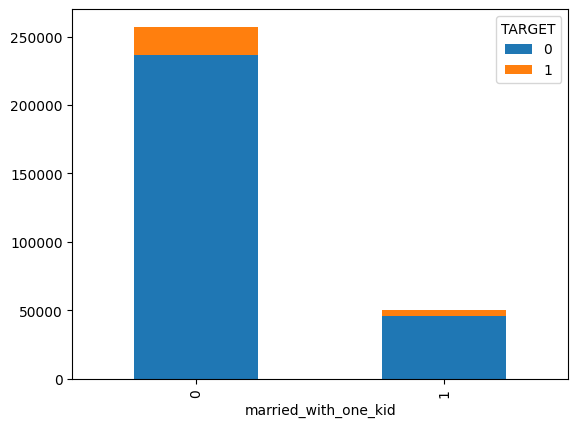

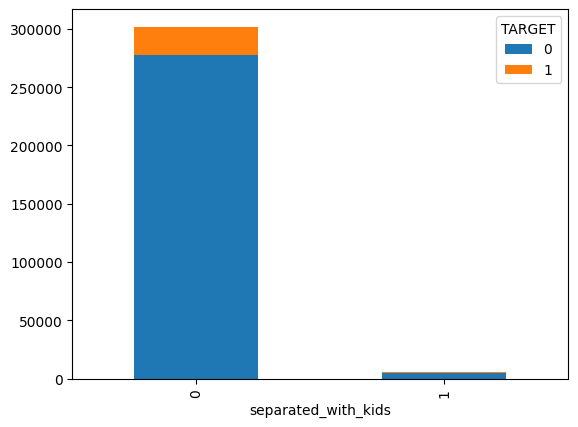

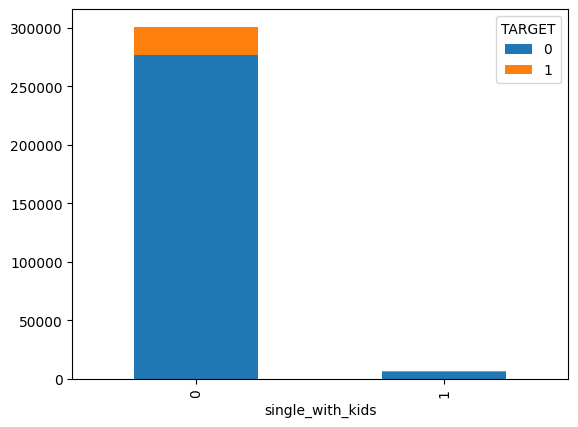

In [25]:
new_columns = ['had_children','married','married_with_kid','married_with_more_kids', 
                'married_with_one_kid', 'separated_with_kids', 'single_with_kids']
for column in new_columns:
    grouped_df = df_family.groupby([column, 'TARGET']).size().unstack(fill_value=0)

    grouped_df.plot(kind='bar', stacked=True)

    print(df_family[[column,'TARGET']].value_counts())


The first perception seems to be that having children affects the commitment to pay the loan on time. The number of children does not seem to affect this anymore, but it is necessary to compare them one by one. The child effect does not appear to appear in the single and separated group.

Finally, let's check the influence of occupation in parents and no parents

In [26]:
# Group by occupation type and targe only parents
grouped_df = df_family[['OCCUPATION_TYPE','TARGET','had_children']].loc[df_family['had_children'] > 0].groupby(by = ['OCCUPATION_TYPE','TARGET'], as_index= False).count()
grouped_df

,OCCUPATION_TYPE,TARGET,had_children
0,Accountants,0,3377
1,Accountants,1,171
2,Cleaning staff,0,1016
3,Cleaning staff,1,139
4,Cooking staff,0,1799
5,Cooking staff,1,255
6,Core staff,0,10163
7,Core staff,1,686
8,Drivers,0,6031
9,Drivers,1,749


It's better to see as percentage (ratio)

In [27]:
grouped_df['total_occupation_type'] = grouped_df.groupby('OCCUPATION_TYPE')['had_children'].transform('sum')
grouped_df['ratio_delayed_payments'] = grouped_df['had_children'] / grouped_df['total_occupation_type']
grouped_df

,OCCUPATION_TYPE,TARGET,had_children,total_occupation_type,ratio_delayed_payments
0,Accountants,0,3377,3548,0.951804
1,Accountants,1,171,3548,0.048196
2,Cleaning staff,0,1016,1155,0.879654
3,Cleaning staff,1,139,1155,0.120346
4,Cooking staff,0,1799,2054,0.875852
5,Cooking staff,1,255,2054,0.124148
6,Core staff,0,10163,10849,0.936768
7,Core staff,1,686,10849,0.063232
8,Drivers,0,6031,6780,0.889528
9,Drivers,1,749,6780,0.110472


Let's see in a graph, we are interesting on people who delayed the payment

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Accountants'),
  Text(1, 0, 'Cleaning staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'HR staff'),
  Text(6, 0, 'High skill tech staff'),
  Text(7, 0, 'IT staff'),
  Text(8, 0, 'Laborers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'Managers'),
  Text(11, 0, 'Medicine staff'),
  Text(12, 0, 'Private service staff'),
  Text(13, 0, 'Realty agents'),
  Text(14, 0, 'Sales staff'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'Security staff'),
  Text(17, 0, 'Waiters/barmen staff')])

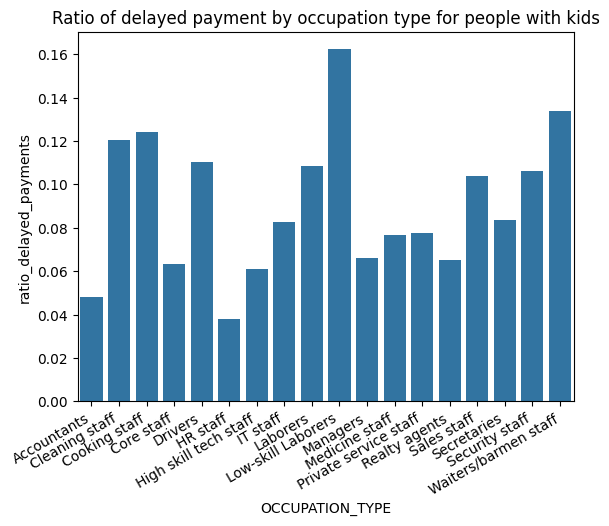

In [28]:
plot_df = grouped_df[['OCCUPATION_TYPE', 'ratio_delayed_payments']].loc[grouped_df['TARGET'] == 1]

sns.barplot(x = 'OCCUPATION_TYPE', y = 'ratio_delayed_payments', data = plot_df).set_title('Ratio of delayed payment by occupation type for people with kids')

# Rotate x-axis labels slightly for better visibility
plt.xticks(rotation=30, ha='right')

Let's check the same process but with people without kids

          OCCUPATION_TYPE  TARGET  had_children  total_occupation_type  \
0             Accountants       0          5962                   6265   
1             Accountants       1           303                   6265   
2          Cleaning staff       0          3190                   3498   
3          Cleaning staff       1           308                   3498   
4           Cooking staff       0          3526                   3892   
5           Cooking staff       1           366                   3892   
6              Core staff       0         15669                  16721   
7              Core staff       1          1052                  16721   
8                 Drivers       0         10465                  11823   
9                 Drivers       1          1358                  11823   
10               HR staff       0           349                    378   
11               HR staff       1            29                    378   
12  High skill tech staff       0     

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Accountants'),
  Text(1, 0, 'Cleaning staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Core staff'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'HR staff'),
  Text(6, 0, 'High skill tech staff'),
  Text(7, 0, 'IT staff'),
  Text(8, 0, 'Laborers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'Managers'),
  Text(11, 0, 'Medicine staff'),
  Text(12, 0, 'Private service staff'),
  Text(13, 0, 'Realty agents'),
  Text(14, 0, 'Sales staff'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'Security staff'),
  Text(17, 0, 'Waiters/barmen staff')])

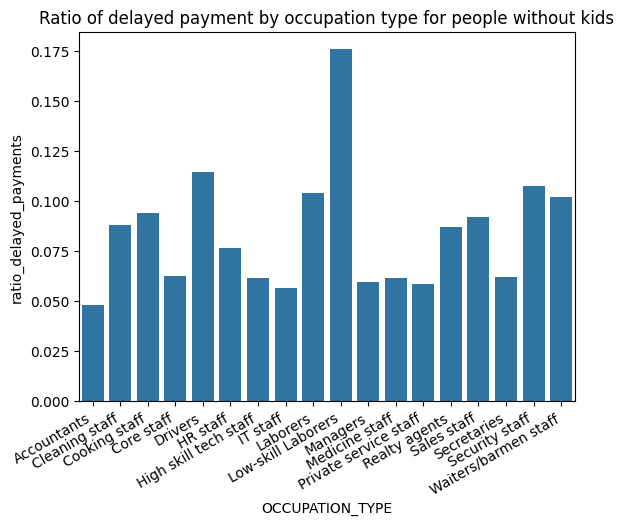

In [29]:
# Group by occupation type and targe only parents
grouped_df = df_family[['OCCUPATION_TYPE','TARGET','had_children']].loc[df_family['had_children'] == 0].groupby(by = ['OCCUPATION_TYPE','TARGET'], as_index= False).count()

grouped_df['total_occupation_type'] = grouped_df.groupby('OCCUPATION_TYPE')['had_children'].transform('sum')
grouped_df['ratio_delayed_payments'] = grouped_df['had_children'] / grouped_df['total_occupation_type']

print(grouped_df)

plot_df = grouped_df[['OCCUPATION_TYPE', 'ratio_delayed_payments']].loc[grouped_df['TARGET'] == 1]

sns.barplot(x = 'OCCUPATION_TYPE', y = 'ratio_delayed_payments', data = plot_df).set_title('Ratio of delayed payment by occupation type for people without kids')

# Rotate x-axis labels slightly for better visibility
plt.xticks(rotation=30, ha='right')

Last social variable to check: age

In [30]:
df_age =  np.floor(df_application_train['DAYS_BIRTH'] / 365).astype(int) * (-1)
df_age.head(5)

0    26
1    46
2    53
3    53
4    55
Name: DAYS_BIRTH, dtype: int32

Text(0.5, 1.0, 'Age')

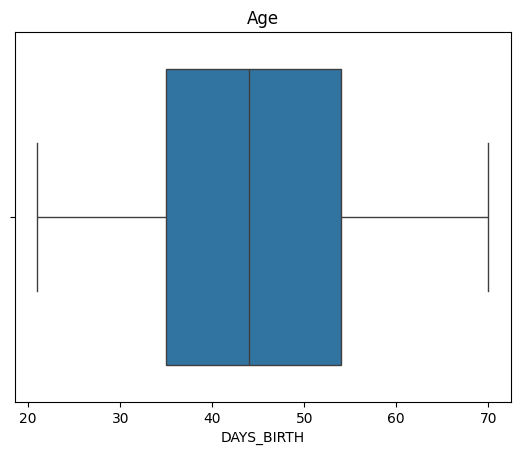

In [31]:
sns.boxplot(x=df_age).set_title('Age')

Text(0.5, 1.0, 'Age distribution')

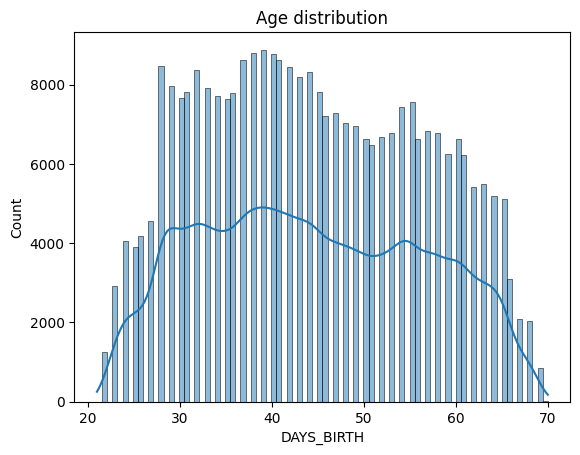

In [32]:
sns.histplot(df_age, kde=True).set_title('Age distribution')

We have a lot of 28-30, 37-42, 55-56. My hypothesis is that in these moments, usually there is a life change decision that need some money, for example between 28-30 some people get married or need to do MBA or other course. Some people may marry later, like around 37. In 55-56 maybe for health problems or aid the kids.

Let's create some categories to see if age somehow influence in pay on date or note

In [33]:
def age_categories(row):
    """ Function to create categories to age"""
    if row <= 25:
        return 'under 25'
    if row > 25 and row <=30:
        return '25-30'
    if row > 30 and row <=35:
        return '30-35'
    if row > 35 and row <=42: 
        return '35-42' # this was kind arbitrary
    if row > 42 and row <=50:
        return '42-50'
    if row > 50 and row <=56:
        return '50-56' # again, just to break the linearity
    if row > 56 and row <=65:
        return '56-65'
    if row > 65:
        return 'more than 65'
    else:
        return 'error'

In [34]:
df_age = df_application_train[['SK_ID_CURR','DAYS_BIRTH','TARGET']].copy()
df_age['age'] = np.floor(df_age['DAYS_BIRTH'] / 365).astype(int) * (-1)

df_age['age_category'] = df_age['age'].apply(age_categories)

plot_df = df_age[['SK_ID_CURR', 'age_category','TARGET']].groupby(by = ['age_category','TARGET'], as_index= False).count()
plot_df

,age_category,TARGET,SK_ID_CURR
0,25-30,0,29200
1,25-30,1,3662
2,30-35,0,35385
3,30-35,1,4055
4,35-42,0,54722
5,35-42,1,5219
6,42-50,0,54998
7,42-50,1,4470
8,50-56,0,38862
9,50-56,1,2705


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '25-30'),
  Text(1, 0, '30-35'),
  Text(2, 0, '35-42'),
  Text(3, 0, '42-50'),
  Text(4, 0, '50-56'),
  Text(5, 0, '56-65'),
  Text(6, 0, 'more than 65'),
  Text(7, 0, 'under 25')])

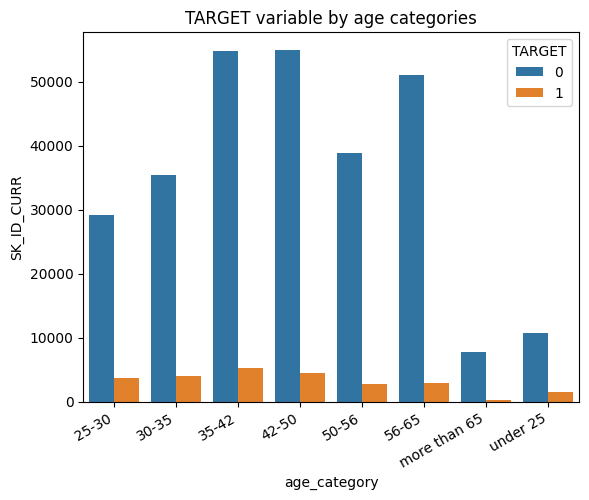

In [35]:
sns.barplot(x = 'age_category', y = 'SK_ID_CURR', hue = 'TARGET', data = plot_df).set_title('TARGET variable by age categories')

# Rotate x-axis labels slightly for better visibility
plt.xticks(rotation=30, ha='right')

Seems that people between 56-65 are less likely to delay the payments and people between 25-35 is more likely to delay

#### 3.4 Incoming & Registration variables

For last, focus on Incoming and registration variables. The main goal here is to understand how income drives the TARGET variable. Also, is it possible to found anything related to change information before applying to a loan?

<Axes: >

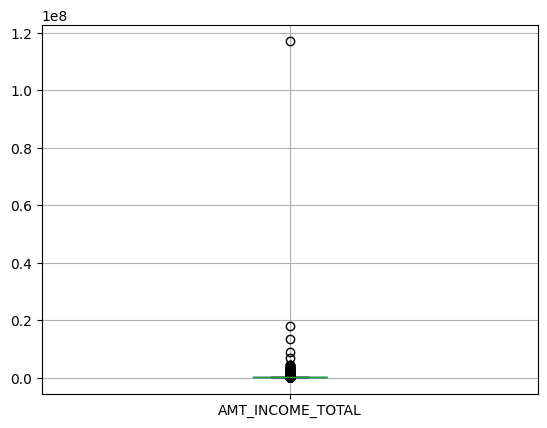

In [36]:
df_application_train.boxplot('AMT_INCOME_TOTAL')

In [37]:
df_application_train['AMT_INCOME_TOTAL'].max()

117000000.0

Seems we had a millionaire in the unbanked population

In [38]:
df_application_train['AMT_INCOME_TOTAL'].mean()

168797.9192969845

Text(0.5, 1.0, 'Income distribution')

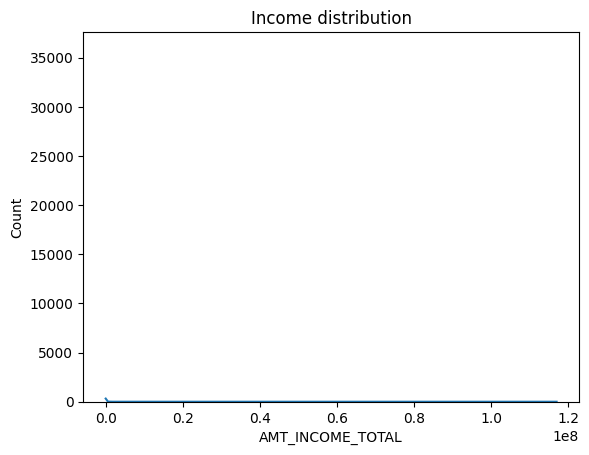

In [39]:
sns.histplot(df_application_train['AMT_INCOME_TOTAL'], kde=True).set_title('Income distribution')

Need to set some categories to better see this. Let's start with < 20k; 20 - 40; 40; - 60; 60 - 100; 100 - 150; 150 - 250; > 250+

In [40]:
def categories_income(income):
    if income < 20000.0:
        return 'Less 20k'
    if income >= 20000.0 and income < 40000.0:
        return '20k - 40k'
    if income >= 40000.0 and income < 60000.0:
        return '40k - 60k'
    if income >= 60000.0 and income < 100000.0:
        return '60k - 100k'
    if income >= 100000.0 and income < 150000.0:
        return '100k - 150k'
    if income >= 150000.0 and income < 250000.0:
        return '150k - 250k'
    if income >= 250000.0:
        return 'more than 250k'
    else:
        return 'error'

In [41]:
df_income_categories = df_application_train['AMT_INCOME_TOTAL'].apply(categories_income)
df_income_categories.head(5)

0       150k - 250k
1    more than 250k
2        60k - 100k
3       100k - 150k
4       100k - 150k
Name: AMT_INCOME_TOTAL, dtype: object

In [42]:
df_income_categories.value_counts()

AMT_INCOME_TOTAL
150k - 250k       112444
100k - 150k        91591
60k - 100k         55146
more than 250k     39778
40k - 60k           7589
20k - 40k            963
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '150k - 250k'),
  Text(1, 0, 'more than 250k'),
  Text(2, 0, '60k - 100k'),
  Text(3, 0, '100k - 150k'),
  Text(4, 0, '20k - 40k'),
  Text(5, 0, '40k - 60k')])

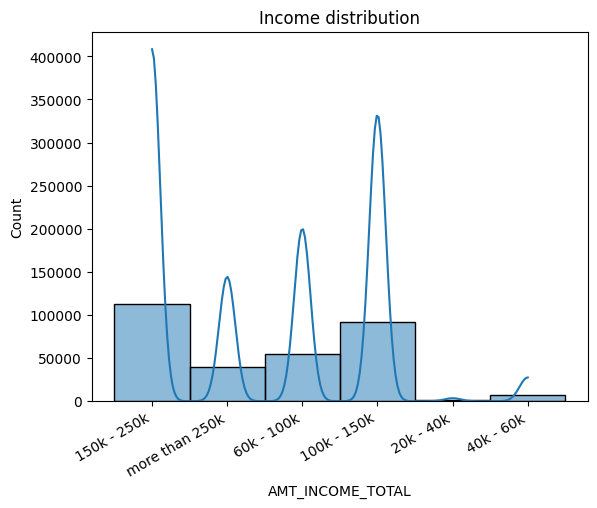

In [43]:
sns.histplot(df_income_categories, kde=True).set_title('Income distribution')

# Rotate x-axis labels slightly for better visibility
plt.xticks(rotation=30, ha='right')

This is a little surprising, was expecting more a low income, because of the problem statement on Kaggle, I was assuming that the population not served by banks would have a lower income.

Let's see the distribution over registration variables

Text(0.5, 1.0, 'Days registration distribution')

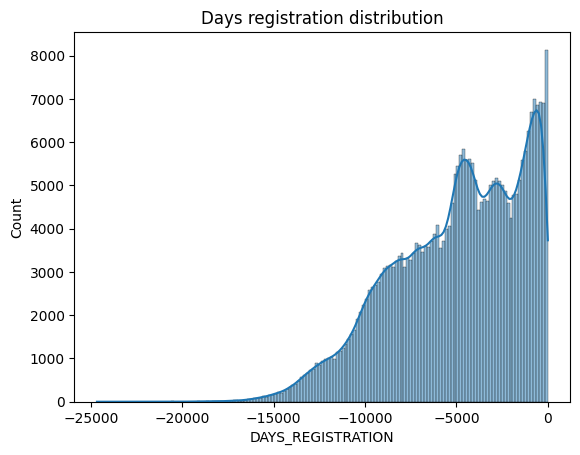

In [44]:
sns.histplot(df_application_train['DAYS_REGISTRATION'], kde=True).set_title('Days registration distribution')

Text(0.5, 1.0, 'Personal ID change distribution')

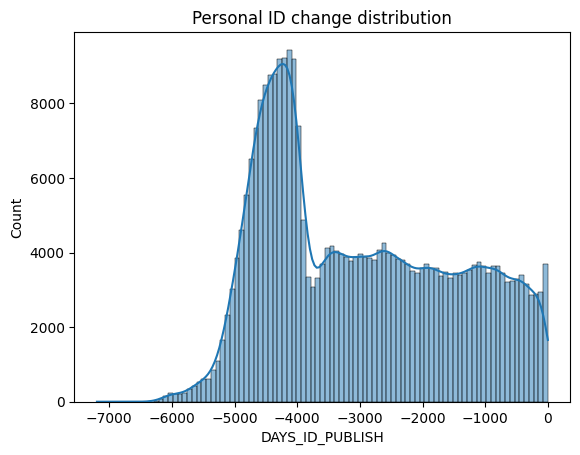

In [45]:
sns.histplot(df_application_train['DAYS_ID_PUBLISH'], kde=True).set_title('Personal ID change distribution')

Most of the changes in personal ID occurred long before the loan application, which makes sense. Some cases have changed very recently, which may be indicative of fraud.
Now they had several registration changes just before applying for a loan. This could be something common, such as updating data to facilitate loan approval. But it can also be an indication of fraud.

Let's explore what happens up to 10 days before the application, the hypothesis here is that recent changes on personal ID **and** customer data may be a fraud, or at least a loan paid with delay. We will filter data aiming to see any pattern that might indicates a fraud

In [46]:
df_possible_fraud = df_application_train[['TARGET', 'SK_ID_CURR', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL']].copy()
df_possible_fraud['recent_change_information'] = 0
df_possible_fraud['recent_change_information'].loc[df_possible_fraud['DAYS_REGISTRATION'] > -10] = 1

df_possible_fraud['recent_change_personal_id'] = 0
df_possible_fraud['recent_change_personal_id'].loc[df_possible_fraud['DAYS_ID_PUBLISH'] > -10] = 1

C:\Users\Pichau\AppData\Local\Temp\ipykernel_7784\2857615944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_possible_fraud['recent_change_information'].loc[df_possible_fraud['DAYS_REGISTRATION'] > -10] = 1
C:\Users\Pichau\AppData\Local\Temp\ipykernel_7784\2857615944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_possible_fraud['recent_change_personal_id'].loc[df_possible_fraud['DAYS_ID_PUBLISH'] > -10] = 1


In [47]:
print(f"total cases of recent contact change: {df_possible_fraud['SK_ID_CURR'].loc[df_possible_fraud['recent_change_information'] > 0].count()}")
print(f"total cases of recent personal id change: {df_possible_fraud['SK_ID_CURR'].loc[df_possible_fraud['recent_change_personal_id'] > 0].count()}")
print(f"total cases of both changes: {df_possible_fraud['SK_ID_CURR'].loc[(df_possible_fraud['recent_change_personal_id'] > 0) & (df_possible_fraud['recent_change_information'] > 0)].count()}")

total cases of recent contact change: 890
total cases of recent personal id change: 622
total cases of both changes: 5


Overall small amount of change in the cases - this may help to identify fraud, but in risk prediction it may be induce some bias to the model

Let's finish our small investigation 

In [48]:
# Avg and std of income for recent change in registration customer data
avg_income_change_info = df_possible_fraud['AMT_INCOME_TOTAL'].loc[df_possible_fraud['recent_change_information'] > 0].mean()
std_income_change_info = df_possible_fraud['AMT_INCOME_TOTAL'].loc[df_possible_fraud['recent_change_information'] > 0].std()

# Avg and std of income for recent change in personal ID
avg_income_change_personal = df_possible_fraud['AMT_INCOME_TOTAL'].loc[df_possible_fraud['recent_change_personal_id'] > 0].mean()
std_income_change_personal = df_possible_fraud['AMT_INCOME_TOTAL'].loc[df_possible_fraud['recent_change_personal_id'] > 0].std()

# Avg and std of income for both cases
avg_income_both = df_possible_fraud['AMT_INCOME_TOTAL'].loc[(df_possible_fraud['recent_change_personal_id'] > 0) & (df_possible_fraud['recent_change_information'] > 0)].mean()
std_income_both = df_possible_fraud['AMT_INCOME_TOTAL'].loc[(df_possible_fraud['recent_change_personal_id'] > 0) & (df_possible_fraud['recent_change_information'] > 0)].std()

print(f"avg of income for those who change info: {avg_income_change_info}")
print(f"std of income for those who change info: {std_income_change_info}")

print(f"avg of income for those who change personal id: {avg_income_change_personal}")
print(f"std of income for those who change personal id: {std_income_change_personal}")

print(f"avg of income for those who change personal id and customer info: {avg_income_both}")
print(f"std of income for those who change personal id and customer info: {std_income_both}")

avg of income for those who change info: 182044.99213483147
std of income for those who change info: 119573.6887434848
avg of income for those who change personal id: 182384.18971061092
std of income for those who change personal id: 105297.63220145873
avg of income for those who change personal id and customer info: 208800.0
std of income for those who change personal id and customer info: 208961.89844084016


In [49]:
df_possible_fraud[['TARGET','recent_change_information','recent_change_personal_id']].groupby(by = 'TARGET', as_index=False).value_counts()

,TARGET,recent_change_information,recent_change_personal_id,count
0,0,0,0,281363
1,0,1,0,769
2,0,0,1,550
3,0,1,1,4
4,1,0,0,24641
5,1,1,0,116
6,1,0,1,67
7,1,1,1,1


There are more cases of late payment among customers who changed their personal ID less than 10 days before applying. Few cases made both changes and only 1 of these cases delayed the loan. If there is fraud, it is probably more linked to changing the personal ID only.

# 4.0 Further analysis on Application Train data

 - Explore all others columns
 - Create more categories about family
 - Add Income to the families categories
 - Clustering these social values
 - Add all other table, to explore together all the relationships